# Les gaz à effet de serre au Québec
---

<div style="text-align: center;">
    <img src="./img/_cc50555b-1857-4a03-a71b-744befcfb323.jpeg" alt="Drawing" style="width: 300px;"/>
</div>

Les données de l'inventaire québécois des émissions de gaz à effet de serre, sont disponibles chez [Données Québec](https://www.donneesquebec.ca/recherche/dataset/inventaire-quebecois-des-emissions-de-gaz-a-effet-de-serre "https://www.donneesquebec.ca/recherche/dataset/inventaire-quebecois-des-emissions-de-gaz-a-effet-de-serre"):

> L’inventaire des émissions de gaz à effet de serre (GES) produits par l’activité humaine au Québec est tenu à jour annuellement depuis 1990 
par le ministère de l’Environnement, de la Lutte contre les changements climatiques, de la Faune et des Parcs. Cet inventaire est établi à partir de données recueillies auprès d’entreprises et d’institutions et se base sur des données obtenues principalement de Statistique Canada, d’Environnement et Changement climatique Canada (ECCC) et de ministères et organismes du Québec. 

Dernière modification du jeux de données de ce notebook : 2022-12-21 

---
## Objectif:

L'objectif de ce notebook est d'utiliser la fonction groupby relative aux dataframes afin d'obtenir le total des GES émis par secteur d'activité.

---
## Importation des données

Afin de lire et d'explorer les données, nous utilisons la librairie pandas avec toutes les fonctionnalités des Dataframes.

In [136]:
import pandas as pd

Le fichier csv (coma-separated-value) se nomme "inventaire-ges.csv" 
et les données sont séparées par des points-virgules (;).

In [137]:
df = pd.read_csv('./fichiers_input/inventaire-ges.csv',sep = ';')
df

,Annee,Secteur,Sous-secteur,Categorie,Emissions(t_eq_CO2)
0,1990,Transports,Transport routier,Automobiles,1.085804e+07
1,1990,Transports,Transport routier,Camions légers,3.636960e+06
2,1990,Transports,Transport routier,Véhicules lourds,3.602432e+06
3,1990,Transports,Transport routier,Autres transports routiers,1.824648e+04
4,1990,Transports,Autres transports,Véhicules hors route - Agriculture et foresterie,9.985400e+05
...,...,...,...,...,...
1445,2020,Matières résiduelles,Lieux d'enfouissement réservés aux usines de p...,Lieux d'enfouissement réservés aux usines de p...,6.994292e+04
1446,2020,Matières résiduelles,Traitement biologique des matières résiduelles,Traitement biologique des matières résiduelles,7.126235e+04
1447,2020,Matières résiduelles,Traitement et rejet des eaux usées municipales,Traitement et rejet des eaux usées municipales,4.134772e+05
1448,2020,Matières résiduelles,Incinération des matières résiduelles,Incinération des matières résiduelles,2.124926e+05


---
## Informations de base sur le jeu de données:

Pour bien comprendre les données dans un DataFrame pandas, vous devez examiner plusieurs aspects clés pour en tirer le meilleur parti. Voici une liste d'informations de base à prendre en compte :

1. La structure du DataFrame :
   - Le nombre de lignes (observations) et de colonnes (variables) dans le DataFrame.
   - Les noms des colonnes, qui représentent les différentes variables.


2. Les types de données :
   - Vérifiez les types de données de chaque colonne à l'aide de `dtypes` pour vous assurer qu'ils sont corrects.

3. Les valeurs uniques :
   - Pour comprendre la variabilité des données catégoriques, utilisez `unique()` pour obtenir les valeurs uniques d'une colonne.

```python
df['colonne'].unique()
```

4. Les données manquantes :
   - Utilisez `isna()` ou `isnull()` pour identifier les données manquantes dans le DataFrame.

```python
df.isna().sum()
```

5. Les statistiques descriptives :
   - Utilisez `describe()` pour obtenir des statistiques de base sur les données numériques, telles que la moyenne, l'écart-type, les quartiles, etc.
  





In [140]:
# Le nombre de ligne (rows) et de colonne (columns) est: 
df.shape

(1450, 5)

In [64]:
# Le nom des colonnes. Sous forme d'une array numpy. 
df.columns

Index(['Annee', 'Secteur', 'Sous-secteur', 'Categorie', 'Emissions(t_eq_CO2)'], dtype='object')

In [78]:
# Le nom des colonnes. Sous forme d'une liste normale.
df.columns.tolist()

['Annee', 'Secteur', 'Sous-secteur', 'Categorie', 'Emissions(t_eq_CO2)']

In [87]:
# Le types de variables dans chaque colonne: 
df.dtypes

Annee                    int64
Secteur                 object
Sous-secteur            object
Categorie               object
Emissions(t_eq_CO2)    float64
dtype: object

In [88]:
# L'index du dataframe: 
df.index

RangeIndex(start=0, stop=1450, step=1)

In [66]:
# Pour travailler les éléments d'une seule colonne, il faut travailler avec les Séries:
df['Annee'];

In [57]:
# Élements uniques de la colonne Secteur. Sous forme d'une liste normale.
df['Secteur'].unique().tolist()

['Transports',
 'Industries',
 'Résidentiel, commercial et institutionnel',
 'Agriculture',
 'Matières résiduelles',
 'Électricité']

In [62]:
# Élements uniques de la colonne Sous-secteur. Sous forme d'une liste normale.
df['Sous-secteur'].unique().tolist();

In [61]:
# Élements uniques de la colonne 'Categorie'. Sous forme d'une liste normale.
df['Categorie'].unique().tolist();

In [139]:
df.isna().sum()

Annee                  0
Secteur                0
Sous-secteur           0
Categorie              0
Emissions(t_eq_CO2)    0
dtype: int64

---
## Sélection du secteur 'Transports'

In [128]:
df_transports = df[df['Secteur']=='Transports']
df_transports

,Annee,Secteur,Sous-secteur,Categorie,Emissions(t_eq_CO2)
0,1990,Transports,Transport routier,Automobiles,1.085804e+07
1,1990,Transports,Transport routier,Camions légers,3.636960e+06
2,1990,Transports,Transport routier,Véhicules lourds,3.602432e+06
3,1990,Transports,Transport routier,Autres transports routiers,1.824648e+04
4,1990,Transports,Autres transports,Véhicules hors route - Agriculture et foresterie,9.985400e+05
...,...,...,...,...,...
1414,2020,Transports,Transport aérien,Transport aérien militaire,9.700063e+03
1415,2020,Transports,Transport ferroviaire,Transport ferroviaire,4.987667e+05
1416,2020,Transports,Transport maritime,Transport maritime intérieur,1.063726e+06
1417,2020,Transports,Transport maritime,Transport maritime pêcheries,1.336989e+04


---
## Obtention du total par année:

In [107]:
df[['Annee','Emissions(t_eq_CO2)']]

,Annee,Emissions(t_eq_CO2)
0,1990,1.085804e+07
1,1990,3.636960e+06
2,1990,3.602432e+06
3,1990,1.824648e+04
4,1990,9.985400e+05
...,...,...
1445,2020,6.994292e+04
1446,2020,7.126235e+04
1447,2020,4.134772e+05
1448,2020,2.124926e+05


In [108]:
df[['Annee','Emissions(t_eq_CO2)']].groupby('Annee')

In [131]:
df_total1 = df[['Annee','Emissions(t_eq_CO2)']].groupby('Annee').sum()
df_total1;

In [126]:
df_total1.columns

Index(['Emissions(t_eq_CO2)'], dtype='object')

<Axes: xlabel='Annee'>

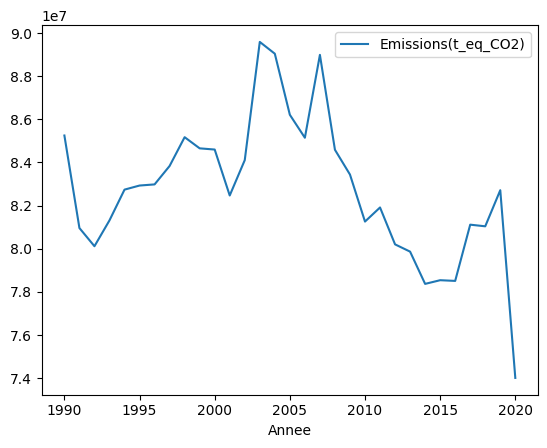

In [133]:
df_total1.plot()

In [134]:
#Pour les transports seulement
df_transports = df[df['Secteur']=='Transports']
df_total2 = df_transports[['Annee','Emissions(t_eq_CO2)']].groupby('Annee').sum()
df_total2;

In [135]:
result = pd.merge(df_total1, df_total2,on=["Annee"])
result;

<Axes: xlabel='Annee'>

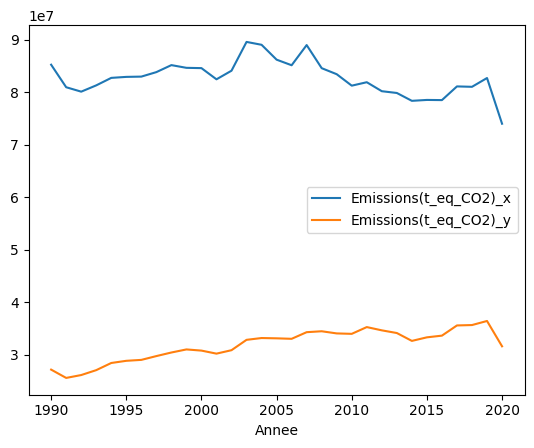

In [130]:
result = pd.merge(df_total1, df_total2, on=["Annee"])
result.plot()

Texte explicatif image
![title0](img/presentation.png)

Le lien est le suivant [example.com](https://example.com/ "https://example.com/").

In [ ]:
# input 1